## Calculating Shape Features

In [14]:
def calculate_shape_features(mask, area_threshold=100):
    # convert mask to binary
    _, binary_mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

    # finding contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # initialize lists to store shape features
    solidity_list = []
    non_compactness_list = []
    circularity_list = []
    eccentricity_list = []

    for contour in contours:
        # calculating area and perimeter of the contour
        area = cv2.contourArea(contour)

        # skipping contours with very small area (below the threshold)
        if area < area_threshold:
            continue

        perimeter = cv2.arcLength(contour, True)

        # calculating solidity (ratio of area to convex hull area)
        hull = cv2.convexHull(contour)
        hull_area = cv2.contourArea(hull)

        # skipping contours with very small convex hull area (below the threshold)
        if hull_area < area_threshold:
            continue

        solidity = area / hull_area

        # calculating non-compactness (ratio of area to the square of perimeter)
        non_compactness = area / (perimeter ** 2)

        # calculating circularity (4 * pi * area / perimeter^2)
        circularity = (4 * np.pi * area) / (perimeter ** 2)

        # calculatiing eccentricity (ratio of minor axis to major axis length)
        _, (major_axis, minor_axis), _ = cv2.fitEllipse(contour)
        eccentricity = minor_axis / major_axis

        # appending shape features to the respective lists
        solidity_list.append(solidity)
        non_compactness_list.append(non_compactness)
        circularity_list.append(circularity)
        eccentricity_list.append(eccentricity)

    return solidity_list, non_compactness_list, circularity_list, eccentricity_list

## Loading Data

In [15]:
# Load segmentation mask (replace 'xx_truth.png' with the actual filename)
mask = cv2.imread('onions/01_truth.png', cv2.IMREAD_GRAYSCALE)
mask.shape

(1986, 2419)

In [16]:
# Calculate shape features
solidity_list, non_compactness_list, circularity_list, eccentricity_list = calculate_shape_features(mask)

## Plotting Distribution

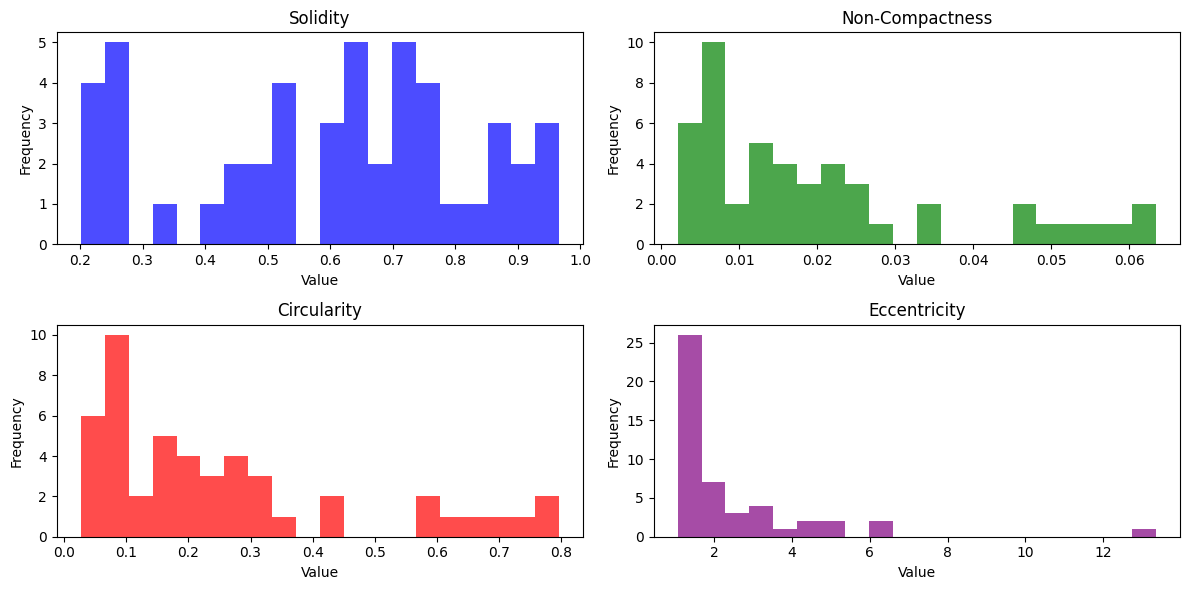

In [17]:
# Plot the distributions of shape features
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(solidity_list, bins=20, color='blue', alpha=0.7)
plt.title('Solidity')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(non_compactness_list, bins=20, color='green', alpha=0.7)
plt.title('Non-Compactness')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(circularity_list, bins=20, color='red', alpha=0.7)
plt.title('Circularity')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(eccentricity_list, bins=20, color='purple', alpha=0.7)
plt.title('Eccentricity')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()